In [57]:
import pandas as pd
from folium.plugins import HeatMap
import folium
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
import os 
filepath = os.path.join(os.getcwd(), 'dataset_grad_pres.csv')

In [59]:
df_completo = pd.read_csv(filepath, engine='python', 
                     on_bad_lines='warn', encoding='iso-8859-1', header=0, sep = ";")

In [60]:
df_completo.keys()

Index(['ANO_INGRESSO', 'SEMESTRE_INGRESSO', 'TIPO_INGRESSO', 'COTA',
       'CURSO_NOME', 'AREA', 'SITUACAO', 'MOTIVO_SAIDA', 'CAMPUS', 'TURNO',
       'ETNIA', 'SEXO', 'TIPOCURSO', 'LNG', 'LAT', 'LOCAL', 'LNG_ORGM',
       'LAT_ORGM', 'LOCAL_ORGM'],
      dtype='object')

In [61]:
# Inclui no final do DataFrame df_completo as colunas:
# Baixa renda; Escola pública; Etnia; PPI; PCD
# e preenche seus valores com "Sim" ou "Não", de acordo com a tabela acima

def classificar_baixa_renda(cota):
    baixa_renda_categorias = ["Grupo A", "Grupo A1", "Grupo B", "Grupo B1"]

    if cota in baixa_renda_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['Baixa renda'] = df_completo['COTA'].apply(classificar_baixa_renda)

def classificar_escola_publica(cota):
    escola_publica_categorias = ["Grupo A", "Grupo A1", "Grupo B", "Grupo B1", "Grupo D", "Grupo D1", "Grupo E", "Grupo E1"]

    if cota in escola_publica_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['Escola pública'] = df_completo['COTA'].apply(classificar_escola_publica)

def classificar_etnia_PPI(cota):
    etnia_ppi_categorias = ["Grupo A", "Grupo A1", "Grupo D", "Grupo D1"]

    if cota in etnia_ppi_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['Etnia PPI'] = df_completo['COTA'].apply(classificar_etnia_PPI)

def classificar_PCD(cota):
    pcd_categorias = ["Grupo A1", "Grupo B1", "Grupo D1", "Grupo E1"]

    if cota in pcd_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['PCD'] = df_completo['COTA'].apply(classificar_PCD)


In [62]:
df_completo['LAT'] = df_completo['LAT'].str.replace(',', '.').astype(float)
df_completo['LNG'] = df_completo['LNG'].str.replace(',', '.').astype(float)
df_completo['LAT_ORGM'] = df_completo['LAT_ORGM'].str.replace(',', '.').astype(float)
df_completo['LNG_ORGM'] = df_completo['LNG_ORGM'].str.replace(',', '.').astype(float)
df_completo['LAT'] = pd.to_numeric(df_completo['LAT'])
df_completo['LNG'] = pd.to_numeric(df_completo['LNG'])
df_completo['LAT_ORGM'] = pd.to_numeric(df_completo['LAT_ORGM'])
df_completo['LNG_ORGM'] = pd.to_numeric(df_completo['LNG_ORGM'])

In [70]:
df_completo

,ANO_INGRESSO,SEMESTRE_INGRESSO,TIPO_INGRESSO,COTA,CURSO_NOME,AREA,SITUACAO,MOTIVO_SAIDA,CAMPUS,TURNO,...,LAT,LOCAL,LNG_ORGM,LAT_ORGM,LOCAL_ORGM,Baixa renda,Escola pública,Etnia PPI,PCD,Estado
27,2010,2,PISM,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,-21.776524,"ALTO DOS PASSOS, JUIZ DE FORA, MG, BRASIL",-43.347358,-21.776524,"ALTO DOS PASSOS, JUIZ DE FORA, MG, BRASIL",Não,Não,Não,Não,MG
49,2011,2,VESTIBULAR,Grupo A,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,...,NaN,", JUIZ DE FORA, MG, BRASIL",-45.251176,-21.694662,"TRES CORACOES, MG, BRASIL",Sim,Sim,Sim,Não,MG
50,2011,2,PISM,Grupo A,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,...,-21.731437,"ELDORADO, JUIZ DE FORA, MG, BRASIL",-43.364319,-21.731437,"ELDORADO, JUIZ DE FORA, MG, BRASIL",Sim,Sim,Sim,Não,MG
51,2011,2,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,...,-21.762424,"CENTRO, JUIZ DE FORA, MG, BRASIL",-43.791998,-21.839869,"LIMA DUARTE, MG, BRASIL",Sim,Sim,Não,Não,MG
52,2011,2,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,...,-21.762323,"STA RITA, JUIZ DE FORA, MG, BRASIL",-43.364151,-21.740906,"SANTA TEREZINHA, JUIZ DE FORA, MG, BRASIL",Sim,Sim,Não,Não,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64535,2023,1,SiSU,Grupo A,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Ativo,A Especificar,JUIZ DE FORA,INTEGRAL,...,-20.678101,"CANAA, MG, BRASIL",-42.609760,-20.678101,"CANAA, MG, BRASIL",Sim,Sim,Sim,Não,MG
64536,2023,1,SiSU,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Ativo,A Especificar,JUIZ DE FORA,INTEGRAL,...,-15.601411,"CUIABA, MT, BRASIL",-56.097892,-15.601411,"CUIABA, MT, BRASIL",Não,Não,Não,Não,MT
64537,2023,1,SiSU,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Ativo,A Especificar,JUIZ DE FORA,INTEGRAL,...,-22.470962,"RESENDE, RJ, BRASIL",-44.451329,-22.470962,"RESENDE, RJ, BRASIL",Não,Não,Não,Não,RJ
64538,2023,1,PISM,Grupo B,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-21.120123,"UBA, MG, BRASIL",-42.942619,-21.120123,"UBA, MG, BRASIL",Sim,Sim,Não,Não,MG


In [64]:
valores_nan = df_completo['LOCAL_ORGM'].isna().sum()
valores_nan

22551

In [65]:
df_completo = df_completo.dropna(subset=['LOCAL_ORGM'])

In [66]:
valores_nan = df_completo['LOCAL_ORGM'].isna().sum()
valores_nan

0

In [67]:
# Crie uma lista para armazenar os estados
estados = []

# Itere sobre os valores da coluna 'LOCAL_ORGM'
for local in df_completo['LOCAL_ORGM']:
    lista_local = local.split(',')
    estado_pais = lista_local[-2:]
    estado = estado_pais[0]
    estados.append(estado)

In [68]:
df_completo['Estado'] = estados

In [69]:
df_completo['Estado']

27        MG
49        MG
50        MG
51        MG
52        MG
        ... 
64535     MG
64536     MT
64537     RJ
64538     MG
64539     MG
Name: Estado, Length: 41989, dtype: object

In [72]:
df_evadidos = df_completo[df_completo['SITUACAO'] == 'Evadido']

In [73]:
# Contar o número de alunos evadidos por estado
contagem_evadidos_por_estado = df_evadidos['Estado'].value_counts()
contagem_evadidos_por_estado

Estado
 MG    11955
 RJ     1442
 SP      338
 ES      122
 BA       39
 DF       20
 GO       13
 RS       12
 PR        9
 PA        9
 CE        8
 SC        7
 MS        7
 RO        6
 SE        4
 AM        4
 MT        4
 AC        3
 MA        2
 PB        2
 PI        1
 TO        1
 PE        1
 RN        1
Name: count, dtype: int64

In [74]:
# Use groupby para agrupar os dados por 'estado' e aplique a função count() para contar as linhas por estado
evadidos_por_estado = df_evadidos.groupby('Estado').size().reset_index(name='Número de evadidos')

In [75]:
# Contar o número total de alunos por estado
contagem_total_por_estado = df_completo['Estado'].value_counts()
contagem_total_por_estado

Estado
 MG    35760
 RJ     4435
 SP      991
 ES      387
 BA      103
 DF       49
 GO       42
 RS       33
 PA       27
 MS       24
 PR       20
 MT       19
 CE       17
 SC       14
 RO       13
 AM       10
 MA        9
 SE        8
 PE        6
 PB        6
 RN        4
 AC        4
 RR        2
 TO        2
 PI        2
 AP        2
Name: count, dtype: int64

In [76]:
# Garantir que as séries tenham os mesmos índices para a divisão
evadidos_por_estado = contagem_total_por_estado.reindex(contagem_total_por_estado.index, fill_value=0)

In [79]:
# Calcular a proporção de alunos evadidos por estado em relação ao total de alunos por estado
proporcao_por_estado = ( contagem_evadidos_por_estado / contagem_total_por_estado ) * 100
proporcao_por_estado

Estado
 AC    75.000000
 AM    40.000000
 AP          NaN
 BA    37.864078
 CE    47.058824
 DF    40.816327
 ES    31.524548
 GO    30.952381
 MA    22.222222
 MG    33.431208
 MS    29.166667
 MT    21.052632
 PA    33.333333
 PB    33.333333
 PE    16.666667
 PI    50.000000
 PR    45.000000
 RJ    32.514092
 RN    25.000000
 RO    46.153846
 RR          NaN
 RS    36.363636
 SC    50.000000
 SE    50.000000
 SP    34.106963
 TO    50.000000
Name: count, dtype: float64

In [81]:
# Ordenar o DataFrame por proporção
proporcao_por_estado = proporcao_por_estado.sort_values(ascending=False)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


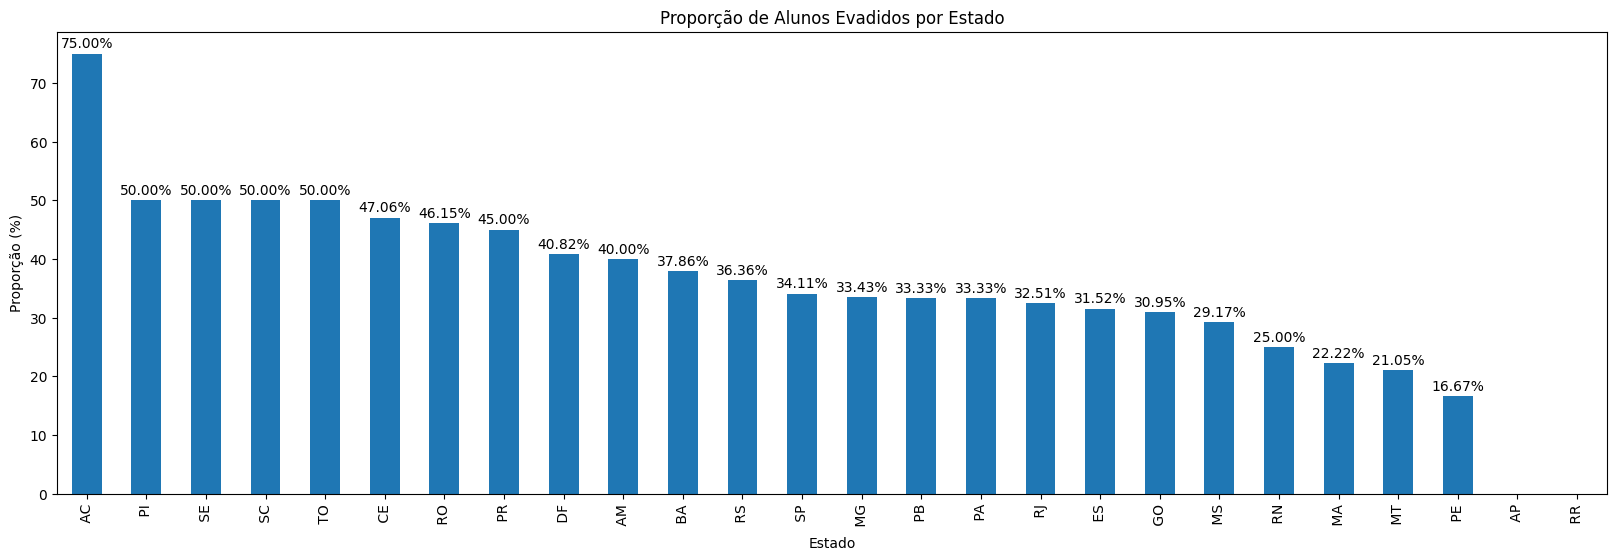

In [85]:
# Criar um gráfico de barras
plt.figure(figsize=(20, 6))
bars = proporcao_por_estado.plot(kind='bar')
plt.title('Proporção de Alunos Evadidos por Estado')
plt.xlabel('Estado')
plt.ylabel('Proporção (%)')

# Adicionar os números nas barras
for i, v in enumerate(proporcao_por_estado):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

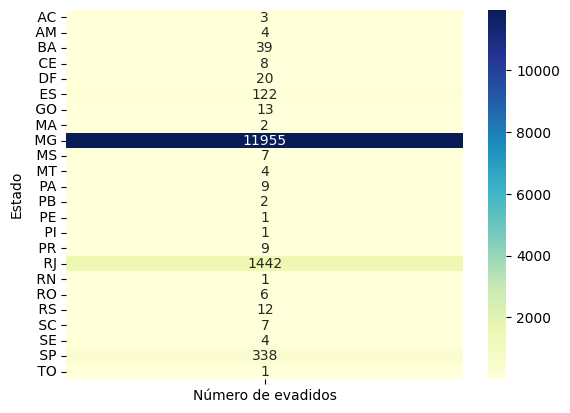

In [18]:
# Use pivot_table para criar uma tabela agregada
heatmap_data = evadidos_por_estado.pivot_table(index='Estado', aggfunc='sum')

# Crie o mapa de calor com o Seaborn
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu')

# Exiba o mapa de calor
plt.show()